In [1]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import mplfinance as mpf
import mplcursors
import requests
import datetime
import json

In [2]:
def bitcoin5years():
    data_atual = datetime.datetime.now()
    # Subtraia 5 anos da data atual
    data_menos_5_anos = data_atual - datetime.timedelta(days=5*365)
    # Formate a data no formato ISO 8601
    data_formatada = data_menos_5_anos.replace(microsecond=0).isoformat()
    # Refatorar data atual para formato ISO 8601
    data_atual = datetime.datetime.now().replace(microsecond=0).isoformat()
    request = f"https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?apikey=DC035A41-F1B1-4EF9-AD10-0349474586C3&period_id=1MTH&time_start={data_formatada}&limit=360&time_end={data_atual}"
    r = requests.get(request)
    #Validar se a requisição retorna 200
    if r.status_code == 200:
        data_dict = json.loads(r.text)
        # Conectando-se ao MongoDB
        client = MongoClient('localhost', 27017)
        db = client['coinmarketcap']
        collection = db['bitcoin_data_last_5_years']
        # Inserindo o dicionário na coleção do MongoDB
        collection.insert_many(data_dict)
        print("Informações adicionadas ao Collection bitcoin_data_last_5_years! - Verifique o seu MongoDB")
        return True
    else:
        print('Erro ao fazer a solicitação HTTP:', r.status_code)
    return 

In [3]:
def bitcoinLast30days():
    data_atual = datetime.datetime.now()
    # Subtraia 1 ano da data atual
    data_menos_30_dias = data_atual - datetime.timedelta(days=30)
    # Formate a data no formato ISO 8601
    data_formatada = data_menos_30_dias.replace(microsecond=0).isoformat()
    # Refatorar data atual para formato ISO 8601
    data_atual = datetime.datetime.now().replace(microsecond=0).isoformat()
    request = f'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?apikey=DC035A41-F1B1-4EF9-AD10-0349474586C3&period_id=1DAY&time_start={data_formatada}&limit=30&time_end={data_atual}'
    r = requests.get(request)
    #Validar se a requisição retorna 200
    if r.status_code == 200:
        data_dict = json.loads(r.text)
        # Conectando-se ao MongoDB
        client = MongoClient('localhost', 27017)
        db = client['coinmarketcap']
        collection = db['bitcoin_data_last_30_days']
        # Inserindo o dicionário na coleção do MongoDB
        collection.insert_many(data_dict)
        print("Informações adicionadas ao Collection bitcoin_data_last_30_days! - Verifique o seu MongoDB")
        return True
    else:
        print('Erro ao fazer a solicitação HTTP:', r.status_code)
    return 

In [4]:
def bitcoin5years_get_db():
    #Configurar o MongoClient
    client = MongoClient('localhost', 27017)
    db = client['coinmarketcap']
    collection = db['bitcoin_data_last_5_years']
    #criar Dicionário
    data_dict=[]
    #alimentar dicionário com dados do BD
    for x in collection.find():
       data_dict.append(x)
    return data_dict

In [5]:
def bitcoin5years_Graphs():
    bitcoin_data = bitcoin5years_get_db()
    # Criar DataFrame do pandas com os dados recuperados do BD
    df = pd.DataFrame(bitcoin_data)
    df['time_close'] = pd.to_datetime(df["time_close"])
    
    # Desenhar gráfico
    plt.figure()
    plt.plot(df['time_close'], df['price_close'], label='Preço de fechamento')
    plt.xlabel('Ano')
    plt.ylabel('Valor(em U$)')
    plt.title('Bitcoin últimos 5 anos')
    plt.grid(True)
    
    # Adicionar rótulos informativos ao passar o mouse sobre os pontos
    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(
        f"Data: {sel.artist.get_xdata()}\nValor: {sel.artist.get_ydata()}"))
    
    plt.show()
    return


In [6]:
def bitcoinLast30days_get_db():
    #Configurar o MongoClient
    client = MongoClient('localhost', 27017)
    db = client['coinmarketcap']
    collection = db['bitcoin_data_last_30_days']
    #criar Dicionário
    data_dict=[]
    #alimentar dicionário com dados do BD
    for x in collection.find():
       data_dict.append(x)
    return data_dict 

In [7]:
def bitcoinLast30days_get_db_Graphs():
    bitcoin_data = bitcoinLast30days_get_db()
    # Criar DataFrame do pandas com os dados recuperados do BD
    df = pd.DataFrame(bitcoin_data)
    # Converter os campos de data para datetime
    df['time_period_start'] = pd.to_datetime(df['time_period_start'])
    df['time_period_end'] = pd.to_datetime(df['time_period_end'])
    df['time_open'] = pd.to_datetime(df['time_open'])
    df['time_close'] = pd.to_datetime(df['time_close'])
    # Selecionar apenas as colunas necessárias
    df = df[['time_period_start', 'price_open', 'price_high', 'price_low', 'price_close', 'trades_count']]
    df.set_index('time_period_start', inplace=True)
    # Renomear as colunas para os nomes esperados pela função mpf.plot()
    df.rename(columns={'price_open': 'Open', 'price_high': 'High', 'price_low': 'Low', 'price_close': 'Close', 'trades_count': 'Volume'}, inplace=True)

    # Personalizar as cores baseadas na flag
    colors = mpf.make_marketcolors(up='g', down='r', edge='inherit', wick='inherit', volume='inherit')
    style = mpf.make_mpf_style(marketcolors=colors, gridstyle='-', y_on_right=True)

    # Definir o tamanho da figura
    fig = plt.figure(figsize=(10, 6))

    # Desenhar gráfico de candlestick
    mpf.plot(df, type='candle', ylabel='Valor(em U$)', volume=False, style=style, figscale=1.5, title='Bitcoin: Últimos 30 dias')

    plt.show()  # Mostrar o gráfico
    return


In [8]:
def main():
    bitcoin5years()
    bitcoinLast30days()
    bitcoin5years_Graphs()
    bitcoinLast30days_get_db_Graphs()
    return

Informações adicionadas ao Collection bitcoin_data_last_5_years! - Verifique o seu MongoDB
Informações adicionadas ao Collection bitcoin_data_last_30_days! - Verifique o seu MongoDB


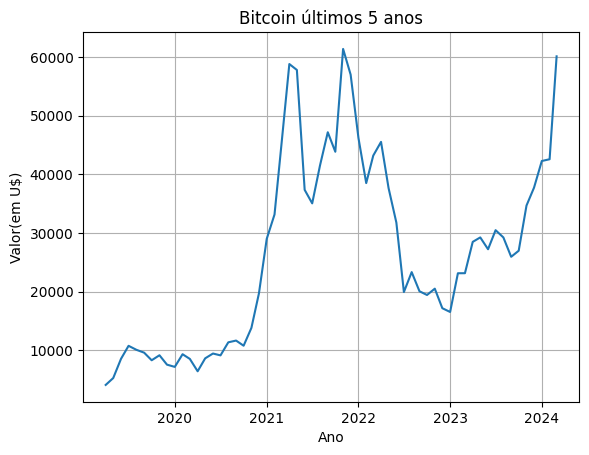

<Figure size 1000x600 with 0 Axes>

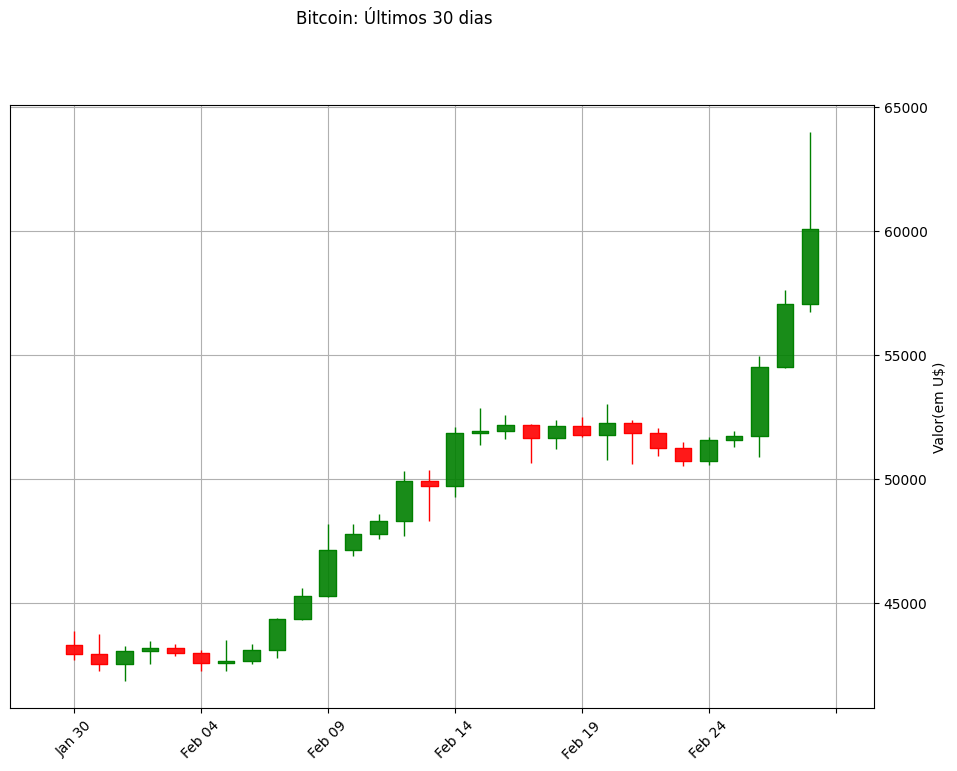

In [9]:
main()